In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [2]:
dataset=pd.read_csv('human_sources.csv')
dataset

,satisfaction_level,received_evaluation_score,number_of_projects performed\n,monthly_avg_work_hour,at the company_calistigi_year_number,job_accident,\nShe/He left the company,promotion_last_5_years,study_section,salary_degree
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
dataset.describe()

,satisfaction_level,received_evaluation_score,number_of_projects performed\n,monthly_avg_work_hour,at the company_calistigi_year_number,job_accident,\nShe/He left the company,promotion_last_5_years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
dataset.corr()

,satisfaction_level,received_evaluation_score,number_of_projects performed\n,monthly_avg_work_hour,at the company_calistigi_year_number,job_accident,\nShe/He left the company,promotion_last_5_years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
received_evaluation_score,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_of_projects performed\n,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
monthly_avg_work_hour,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
at the company_calistigi_year_number,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
job_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
\nShe/He left the company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


the list of feature that I identified form the corealation
as the satisfication is the target variable and it is showing good realation with these listed below  feature


In [5]:
#Identify the attributes that you think should be used (effectively) for each model. 
print("recieved_evalution_year\nthe company_calistigi_year_number\nShe/He left the company\nnumber_of_projects performed\nat the company_calistigi_year_number")	

recieved_evalution_year
the company_calistigi_year_number
She/He left the company
number_of_projects performed
at the company_calistigi_year_number


In [6]:
#Convert categorical columns to binary vector representation with one-hot encoding method.
study_section=dataset['study_section']
salary_degree=dataset['salary_degree']
#study sectoin encoded
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(study_section)
print(integer_encoded)
onehotencoder=OneHotEncoder(sparse=False)
integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded=onehotencoder.fit_transform(integer_encoded)
print(onehot_encoded)
#salary_degree encoded
integer_encoded1=label_encoder.fit_transform(salary_degree)
print(integer_encoded1)
integer_encoded1=integer_encoded1.reshape(len(integer_encoded1),1)
onehot_encoded1=onehotencoder.fit_transform(integer_encoded1)
print(onehot_encoded1)





[7 7 7 ... 8 8 8]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[1 2 2 ... 1 1 1]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [7]:
dataset['salary_degree']=onehot_encoded1
dataset['study_section']=onehot_encoded

In [8]:
dataset.describe()

,satisfaction_level,received_evaluation_score,number_of_projects performed\n,monthly_avg_work_hour,at the company_calistigi_year_number,job_accident,\nShe/He left the company,promotion_last_5_years,study_section,salary_degree
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.082472
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.275092
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


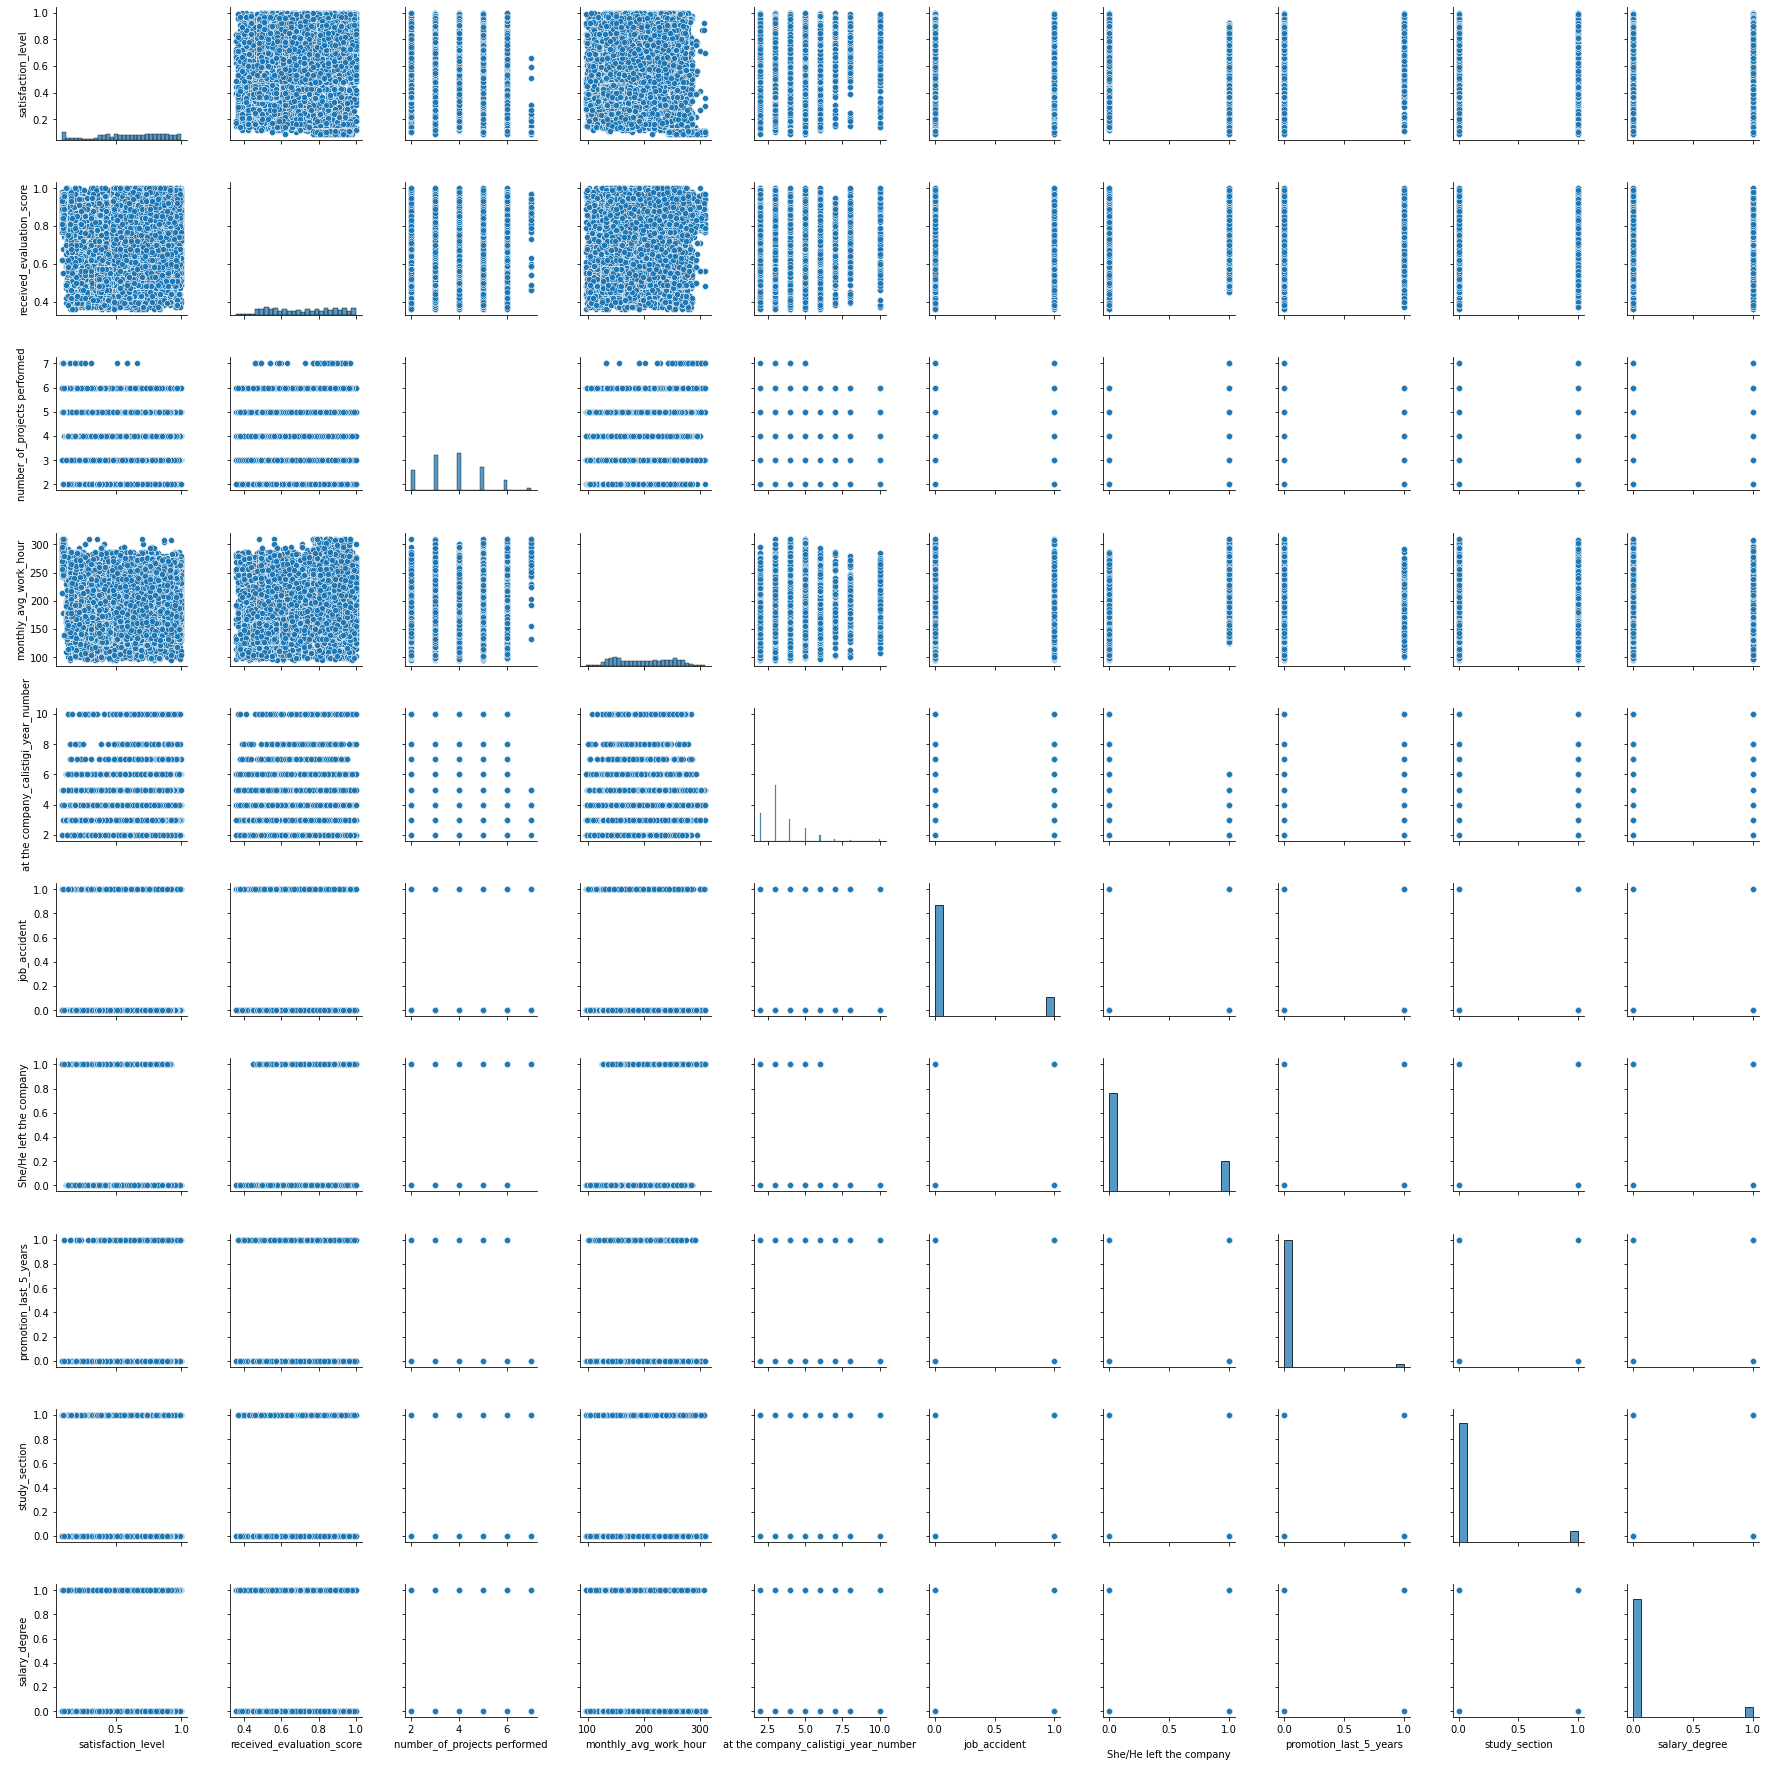

In [9]:
sns.pairplot(dataset)

In [10]:
model =  ExtraTreesRegressor(n_estimators=250,
                              random_state=0)
Y=dataset.iloc[:,0]
X=dataset.iloc[:,1:7]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2)
print(xtrain.shape,ytrain.shape)
model.fit(xtrain,ytrain)



(11999, 6) (11999,)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [11]:
ypre=model.predict(xtest)
print(model.score(xtest,ytest))

0.4854945131224092


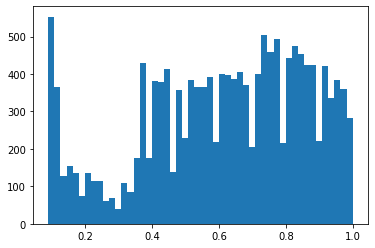

In [19]:
dataset
df = dataset[['satisfaction_level','received_evaluation_score','monthly_avg_work_hour']]
Y = df['satisfaction_level'].values
#X = df[['monthly_avg_work_hour','received_evaluation_score']].values
X = df['received_evaluation_score'].values
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2)
ytrain = ytrain.reshape(-1,1)
mod = LinearRegression()
ytest = ytest.reshape(-1,1)
mod = mod.fit(xtrain.reshape(-1,1),ytrain)

mod.score(xtest.reshape(-1,1),ytest.reshape(-1,1))


0.010353312880543086

In [32]:
#will employ leave the company
classification_Dataset=dataset[['number_of_projects performed\n','\nShe/He left the company','promotion_last_5_years','study_section','salary_degree']]
classification_Dataset
X=classification_Dataset
X=X.drop(['\nShe/He left the company'],axis=1)
Y=classification_Dataset['\nShe/He left the company']
print(Y)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2)


0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: \nShe/He left the company, Length: 14999, dtype: int64


In [40]:
DT=DecisionTreeClassifier(criterion='entropy',max_depth=3)
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
pre=DT.predict(xtest)
print(accuracy_score(ytest,pre))

0.84


In [45]:
X=classification_Dataset
X=X.drop(['salary_degree'],axis=1)
Y=classification_Dataset['salary_degree']
xtrian,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2)




In [46]:
DT.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
pre=DT.predict(xtest)
print(accuracy_score(pre,ytest))

0.928


In [52]:
KM=KMeans(n_clusters=4,random_state=0)
KM.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)